In [1]:
import matplotlib.pyplot as plt
def freq_resp(b = [1], a = [1, -.9]):
    
    # Calculate the frequency response
    w, h = sig.freqz(b, a)

    # Plot the magnitude and phase response
    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.plot(w/np.pi, 20 * np.log10(abs(h)))
    plt.xlabel('Normalized Frequency (rad/sample)')
    plt.ylabel('Magnitude (dB)')
    plt.title('Magnitude Response')

    plt.subplot(2, 1, 2)
    plt.plot(w, np.angle(h, deg=True))
    plt.xlabel('Normalized Frequency (rad/sample)')
    plt.ylabel('Phase (degrees)')
    plt.title('Phase Response')

    plt.tight_layout()
    plt.show()

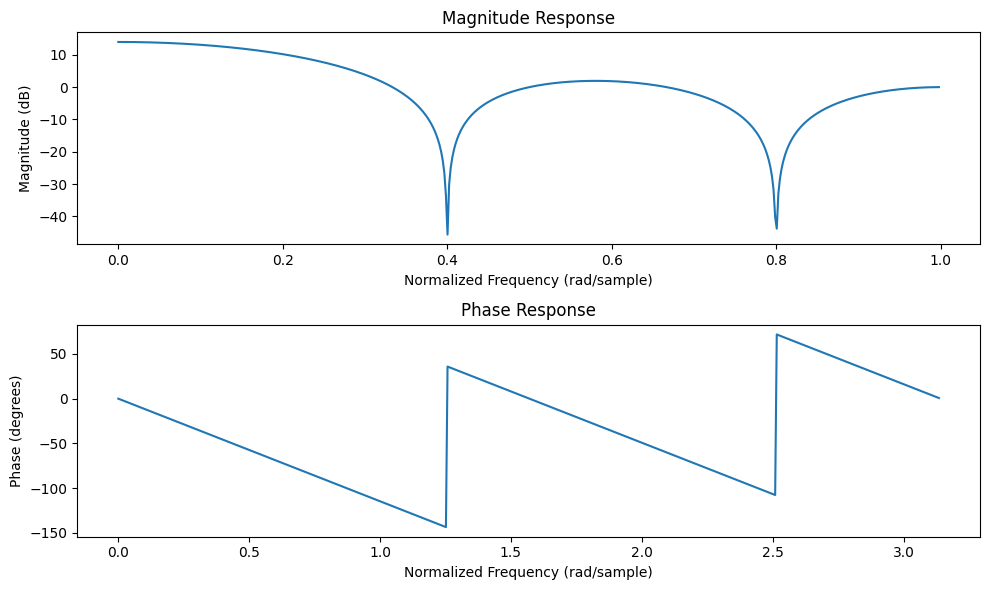

In [16]:
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

b = [1, 1, 1, 1, 1]
a = [1]
N  = 10000 #number of iterations 
mu = .051
x = np.random.normal(0, 1, N)
d = sig.lfilter(b, a, x)
freq_resp(b, a)

[[ 0.22811571]
 [ 0.25440151]
 [ 0.13793222]
 [-0.42128334]
 [ 0.41493732]]


C:\Users\npdho\AppData\Local\Temp\ipykernel_33668\647760923.py:22: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  e[i] = d[i]-y


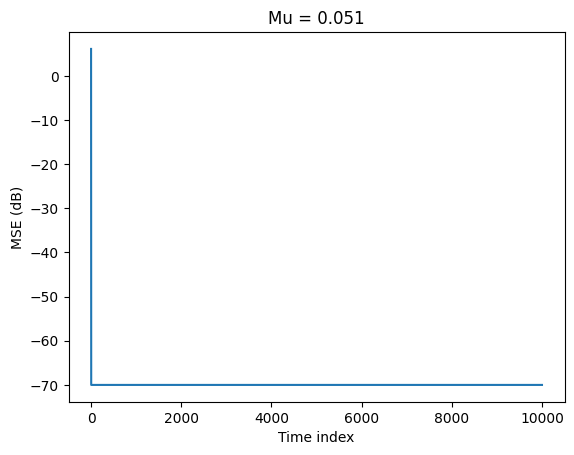

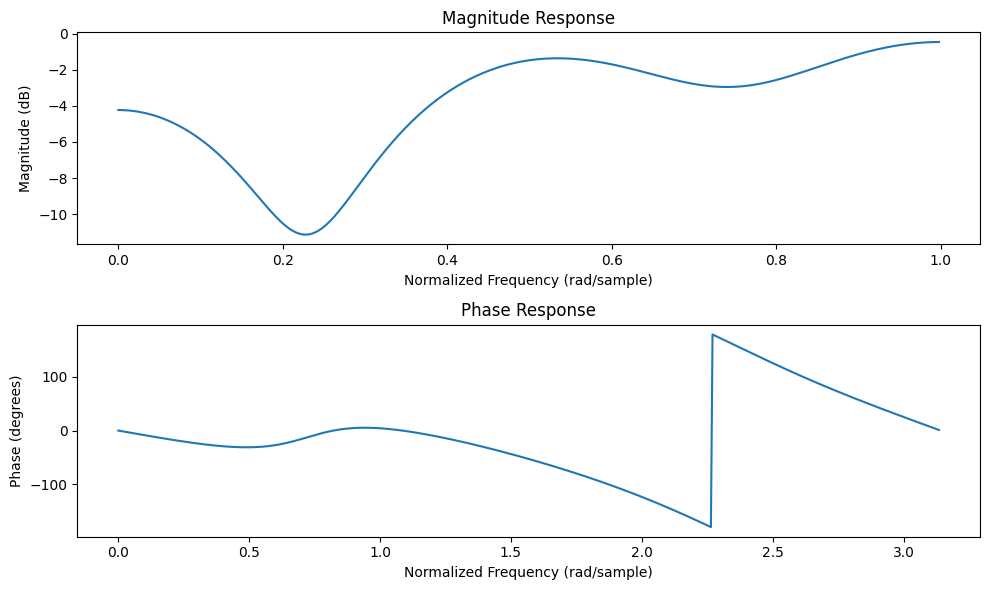

bhat = 
 [[ 0.22811571]
 [ 0.25440151]
 [ 0.13793222]
 [-0.42128334]
 [ 0.41493732]]


In [17]:
L=4
coef = L+1
Nb = 1
s = 1
y = np.zeros_like(d)
e = np.zeros_like(d)
bhat = np.zeros([L+1, 1])
for i in range(700):
    xlist = [] #using this to dynamically create NbxL+1 matrix

    #creating the NbxL matrix
    for j in range(Nb): 
        #create the first vector
        location = i*s+j #block index*shift + vector iteration
        xb = np.flip(x[location : location+coef]) #

        xlist.append(xb)
        #break   

    xb = np.array(xlist).reshape(Nb, coef)
    y = np.dot(xb, bhat)
    e[i] = d[i]-y
    bhat = bhat + 2*mu*e[i]*xb.T
    if i == 0:
        break
        print()
print(bhat)

plt.plot(10*np.log10(e*e+.0000001))
plt.ylabel('MSE (dB)')
plt.xlabel('Time index')
string = 'Mu = ' + str(mu)
plt.title(string)
plt.show()
freq_resp(bhat, [1])

print("bhat = \n", bhat)

C:\Users\npdho\AppData\Local\Temp\ipykernel_33668\3921201507.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  e[n] = d[n]-y


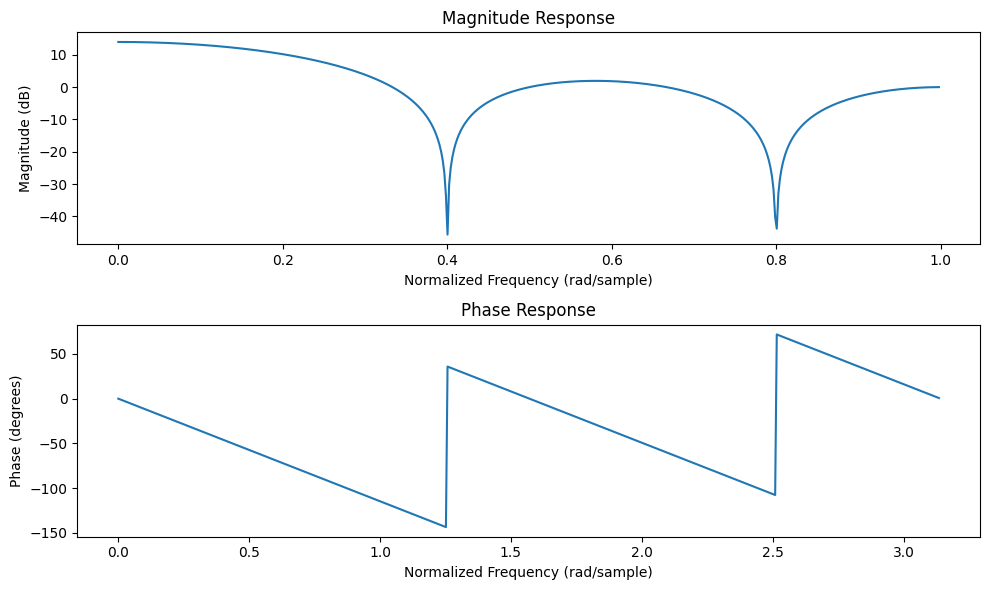

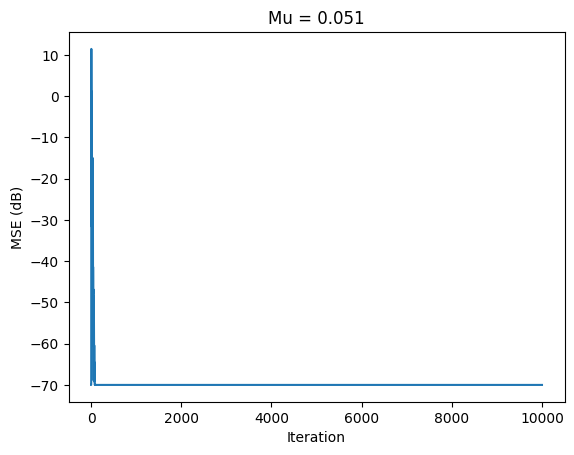